In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [2]:
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


Normalization

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

因我們需要讓模型自由預測價格，所以不會有 sigmoid 啟動函數

In [4]:
from keras import layers, Sequential

def build_model():
    model = Sequential(
        [
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(1)
        ]
    )
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

In [6]:
all_mae_history = []
for i in range(k):
    print('Processing fold #', i)
    partial_start = i * num_val_samples
    next_partial_begin = (i + 1) * num_val_samples
    val_data = train_data[partial_start: next_partial_begin] # 取自第 i 個區塊 當這一折的驗證資料
    val_target = train_targets[partial_start: next_partial_begin]

    partial_train_data = np.concatenate([
        train_data[:partial_start], train_data[next_partial_begin:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:partial_start], train_targets[next_partial_begin:]
    ], axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_target), verbose=0)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [10]:
mae_history

[5.643550395965576,
 4.141595363616943,
 3.68713116645813,
 3.24336838722229,
 3.237455368041992,
 3.1752817630767822,
 3.0780277252197266,
 2.7696375846862793,
 2.881237745285034,
 2.9087114334106445,
 2.8528988361358643,
 2.917147159576416,
 2.7009172439575195,
 2.7141427993774414,
 2.6879689693450928,
 2.6999764442443848,
 2.8167519569396973,
 2.803719997406006,
 2.6645843982696533,
 2.5207161903381348,
 2.814077138900757,
 2.70593523979187,
 2.812051296234131,
 2.482142925262451,
 2.5469777584075928,
 2.5738494396209717,
 2.63720965385437,
 2.591411590576172,
 2.4150352478027344,
 2.578336238861084,
 2.416175603866577,
 2.6521034240722656,
 2.4741852283477783,
 2.543926954269409,
 2.8808584213256836,
 2.3695850372314453,
 2.350447177886963,
 2.440307378768921,
 2.364861011505127,
 2.794875383377075,
 2.375044584274292,
 2.474579095840454,
 2.2980120182037354,
 2.4377517700195312,
 2.486715078353882,
 2.409998893737793,
 2.6076178550720215,
 2.4407622814178467,
 2.4841549396514893,


In [8]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

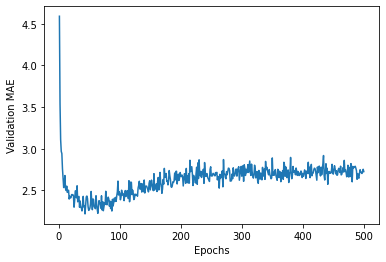

In [11]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

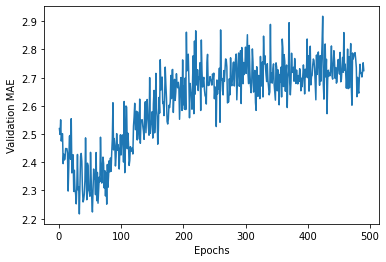

In [14]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
model = build_model()
model.fit(train_data, train_targets, epochs=125, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/125
26/26 [==============================] - 1s 5ms/step - loss: 509.9145 - mae: 20.7357
Epoch 2/125
26/26 [==============================] - 0s 5ms/step - loss: 339.2844 - mae: 16.4164
Epoch 3/125
26/26 [==============================] - 0s 4ms/step - loss: 160.9094 - mae: 10.4735
Epoch 4/125
26/26 [==============================] - 0s 4ms/step - loss: 69.5539 - mae: 6.2846
Epoch 5/125
26/26 [==============================] - 0s 4ms/step - loss: 41.8717 - mae: 4.6598
Epoch 6/125
26/26 [==============================] - 0s 4ms/step - loss: 29.6128 - mae: 3.8224
Epoch 7/125
26/26 [==============================] - 0s 4ms/step - loss: 23.8219 - mae: 3.3629
Epoch 8/125
26/26 [==============================] - 0s 3ms/step - loss: 20.6319 - mae: 3.1102
Epoch 9/125
26/26 [==============================] - 0s 3ms/step - loss: 18.2289 - mae: 2.9227
Epoch 10/125
26/26 [==============================] - 0s 3ms/step - loss: 16.5685 - mae: 2.8139
Epoch 11/125
26/26 [=======================

In [17]:
test_mae_score

2.4967260360717773

In [20]:
predictions = model.predict(test_data)
predictions

4/4 [==============================] - 0s 2ms/step


array([[ 7.4593   ],
       [18.678576 ],
       [20.986717 ],
       [32.1895   ],
       [23.847073 ],
       [21.074417 ],
       [25.570656 ],
       [21.246567 ],
       [18.972172 ],
       [21.251408 ],
       [17.675419 ],
       [16.748093 ],
       [15.696219 ],
       [41.89784  ],
       [20.047895 ],
       [19.703981 ],
       [24.486221 ],
       [18.717768 ],
       [17.454056 ],
       [22.959904 ],
       [10.300347 ],
       [12.344356 ],
       [20.606876 ],
       [15.237109 ],
       [17.10065  ],
       [22.745398 ],
       [28.735126 ],
       [27.362038 ],
       [11.200244 ],
       [18.426283 ],
       [19.86121  ],
       [14.768571 ],
       [32.790607 ],
       [23.071152 ],
       [17.494045 ],
       [ 7.4246964],
       [17.875675 ],
       [18.4702   ],
       [18.085615 ],
       [24.52071  ],
       [31.245802 ],
       [26.820724 ],
       [12.089219 ],
       [42.566418 ],
       [29.088228 ],
       [25.654003 ],
       [27.687159 ],
       [18.20